### **Import Libraries and the upload dataset**

The following modules are used to utilize the functionalities they provide
- pandas - for data manipulation 
- datetime - for conversion of month-year to integer value

In [ ]:
import pandas as pd
import datetime

# **DATA PREPROCESSING ASSIGNMENT**

**Submitted By:**

- 106117044 - Lisa R 
- 106117068 - Naveena P
- 106117069 - Navin Elamparithi P
- 106117098 - Sruthi Susan Kuriakose
- 106117110 - Voleti Lakshmi Sravani


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#note to teammates: change the path of the dataset accordingly

data = pd.read_csv('/content/drive/My Drive/lending-club-loans.csv', low_memory = False);

data_desc = pd.read_csv('/content/drive/My Drive/LCDataDictionary.csv')

In [ ]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,0.837,9.0,False,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,0.094,4.0,False,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,0.985,10.0,False,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,0.210,37.0,False,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,0.539,38.0,False,270.78,270.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4

### **Identify and Handle Missing values, Null Values and Typos**

First, we drop rows and columns with all values as null/missing.

In [ ]:
#dimensions before preprocessing
data.shape

(42553, 115)

Dimensions after removing the rows with all null/missing

In [ ]:
#rows

data.dropna(axis=0, how = 'all', inplace = True)

#dimensions after removing the rows with all null/missing
data.shape

(42553, 115)

Dimensions after removing the columns with all null/missing

In [ ]:
#columns

data.dropna(axis=1, how = 'all', inplace = True)

#dimensions after removing the columns with all null/missing
data.shape

(42553, 61)



Remove the rows which has more than 50% of values as NULL/empty as they do not contribute to the result much

In [ ]:

data.dropna(axis=0, thresh = 0.5* data.isnull().sum(axis = 1), inplace = True)
data.shape

(42550, 61)

In [ ]:

data.dropna(axis=1, thresh = 0.5 * data.isnull().sum(axis = 0) , inplace = True)
data.shape

(42550, 59)

In [ ]:
data


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,NaN,3.0,0.0,13648.0,0.837,9.0,False,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,Sep-16,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,NaN,3.0,0.0,1687.0,0.094,4.0,False,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-16,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,NaN,2.0,0.0,2956.0,0.985,10.0,False,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,Sep-16,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,690.0,694.0,1.0,35.0,10.0,0.0,5598.0,0.210,37.0,False,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,695.0,699.0,0.0,38.0,15.0,0.0,27783.0,0.539,38.0,False,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.0000,Sep-16,67.79,Sep-16,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42546,670124,856744.0,20000.0,20000.0,14999.99653,60 months,17.51%,502.56,E,E4,"Get Fresh Sales, Inc",3 years,MORTGAGE,64480.0,Source Verified,Feb-11,Charged Off,False,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Debt refinance,891xx,NV,15.97,0.0,Apr-77,695.0,699.0,0.0,NaN,18.0,1.0,25058.0,0.731,32.0,False,0.00,0.00,5527.140000,4140.46,2486.34,3023.23,0.00,17.57,0.0000,Jan-12,502.56,Sep-16,674.0,670.0,False,True,INDIVIDUAL,False,False,0.0,1.0,False
42547,567541,730106.0,16000.0,16000.0,15605.38428,60 months,6.91%,316.15,A,A5,"Adams, Hoefer, Holwadel & Eldridge",2 years,MORTGAGE,

Removing extra letters and symbols which are common for all entries.

In [ ]:
#removing months to convert to float
data['term'] = data['term'].str.rstrip(' months').astype('float')

#removing % to convert to float
data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float')

In [ ]:
data['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
42546      3 years
42547      2 years
42548     < 1 year
42549      3 years
42550    10+ years
Name: emp_length, Length: 42550, dtype: object

In [ ]:
#extracting only the integer values from the emp_length column
data['emp_length'] = data['emp_length'].str.extract('(\d+)')
data['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
42546     3
42547     2
42548     1
42549     3
42550    10
Name: emp_length, Length: 42550, dtype: object

Null or missing values may also be represented as 0 or 'n/a'.

We can replace it with mode of that row.


In [ ]:
for column in data.columns:
    mode = data[column].mode()[0] #chooses first of the possible modes (as there can be more than one mode value)
    data[column].replace(['n/a', 'N/A'], mode )
    data[column].fillna(mode, inplace = True)

In [ ]:
data.dtypes

id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                          float64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                       bool
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_

### **Identify and handle duplicate rows, redundant columns and categorical values in columns**

First, we identify and handle duplicate rows. 


In [ ]:
data.shape

(42550, 59)

In [ ]:
#check if there are any duplicate rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
42546     True
42547     True
42548     True
42549     True
42550    False
Length: 42550, dtype: bool

In [ ]:
#check the number of duplicate rows
data.duplicated().sum()

15

There are 15 duplicate rows. The duplicated rows are as follows:

In [ ]:
#show rows that are duplicated
data.loc[data.duplicated(), :]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
42528,727804,923352.0,5000.0,5000.0,5000.000000,36.0,6.92,154.21,A,A3,nelson westerberg,9,RENT,48000.0,Not Verified,Apr-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,loan,601xx,IL,14.93,0.0,Feb-03,765.0,769.0,1.0,0.0,8.0,0.0,4501.0,0.236,16.0,False,0.0,0.0,5478.054023,5478.05,5000.00,478.05,0.0,0.00,0.0000,Nov-13,58.07,Sep-16,794.0,790.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
42536,1071795,1306957.0,5600.0,5600.0,5600.000000,60.0,21.28,152.39,F,F2,US Army,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-04,675.0,679.0,2.0,0.0,11.0,0.0,5210.0,0.326,13.0,False,0.0,0.0,646.020000,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,Sep-16,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
42537,85961,85923.0,1200.0,1200.0,500.000000,36.0,9.01,38.17,B,B2,Classic Components,1,RENT,36000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,False,https://lendingclub.com/browse/loanDetail.acti...,I am one month away from starting my new job i...,other,College Debt Consolidation,787xx,TX,3.27,0.0,Oct-99,705.0,709.0,0.0,0.0,7.0,0.0,0.0,0.000,15.0,False,0.0,0.0,1373.990771,572.50,1200.00,173.99,0.0,0.00,0.0000,Jul-10,39.05,Sep-16,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
42538,427722,505512.0,5000.0,5000.0,4892.425415,36.0,13.22,169.01,C,C2,Computech Inc.,1,OTHER,80000.0,Verified,Sep-09,Does not meet the credit policy. Status:Fully ...,False,https://lendingclub.com/browse/loanDetail.acti...,"Getting Comcast and ADT Services, and an HDTV ...",major_purchase,Minor Home Loan,200xx,DC,11.85,1.0,Nov-98,685.0,689.0,4.0,12.0,14.0,0.0,2023.0,0.189,21.0,False,0.0,0.0,6084.060497,5947.17,5000.00,1084.06,0.0,0.00,0.0000,Sep-12,176.04,Sep-12,609.0,605.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
42539,691253,881809.0,10000.0,10000.0,9850.000000,36.0,6.92,308.41,A,A3,"Cahill, Schmitz, and Cahill",1,MORTGAGE,87200.0,Not Verified,Mar-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 03/03/11 > I have purchase...,other,Rehab Investment Property,553xx,MN,10.68,0.0,Oct-00,760.0,764.0,3.0,0.0,9.0,0.0,77452.0,0.655,25.0,False,0.0,0.0,10114.990210,9963.27,10000.00,114.99,0.0,0.00,0.0000,May-11,9808.13,Apr-14,799.0,795.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
42540,714553,907984.0,16000.0,16000.0,16000.000000,60.0,17.14,398.85,E,E3,Federal Aviation Administration,8,RENT,83202.0,Verified,Apr-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 03/28/11 > This loan is to...,debt_consolidation,Debt Consolidation Loan,761xx,TX,9.23,0.0,May-01,690.0,694.0,0.0,27.0,23.0,0.0,14984.0,0.441,43.0,False,0.0,0.0,21781.313670,21781.31,16000.00,5781.31,0.0,0.00,0.0000,Nov-13,9830.07,Sep-16,769.0,765.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
42541,852787,1064904.0,8300.0,8300.0,8300.000000,36.0,8.49,261.98,A,A5,Mercantil Commercebank,5,OWN,50000.0,Not Verified,Aug-11,Charged Off,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/16

We have dropped these 15 rows now. 

In [ ]:
#keep the first occurence
data = data.drop_duplicates(keep='first')

In [ ]:
data.shape

(42535, 59)

We have now removed the duplicate rows. 

In [ ]:
#dropping redundant columns
drop_list=['url','desc','id','member_id','funded_amnt','funded_amnt_inv','int_rate','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt', 'application_type']
data = data.drop(drop_list, axis=1)

In [ ]:
data.shape

(42535, 36)

We have removed 23 columns that are redundant.

In [ ]:
#handling categorical values - check the datatype of values in each column
data.dtypes

loan_amnt                     float64
term                          float64
installment                   float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                       bool
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status              bool
last_credit_

Columns with object, bool dtypes may contain categorical values. 


Let us now replace all booleans and a few objects with 0/1.

In [ ]:
#convert bool to int, object to int
data[['emp_length', 'pymnt_plan', 'initial_list_status', 'policy_code', 'acc_now_delinq', 'tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths']] = data[['emp_length', 'pymnt_plan', 'initial_list_status', 'policy_code', 'acc_now_delinq', 'tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths']].astype(float)

In [ ]:
data.dtypes

loan_amnt                     float64
term                          float64
installment                   float64
grade                          object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                    float64
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status           float64
last_credit_

Let us assume that A>B>C>D>E>F>G

In [ ]:
#handling ordinal values
grade_dict = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
data['grade'].replace(grade_dict, inplace=True)

In [ ]:
data.dtypes

loan_amnt                     float64
term                          float64
installment                   float64
grade                           int64
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                    float64
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status           float64
last_credit_

In [ ]:
data['purpose'].unique().shape

(14,)

In [ ]:
data['loan_status'].unique().shape

(9,)

In [ ]:
data['title'].unique().shape

(21253,)

In [ ]:
data['addr_state'].unique().shape

(50,)

In [ ]:
#label encoding
data['purpose'] = data['purpose'].astype('category').cat.codes
data['loan_status'] = data['loan_status'].astype('category').cat.codes
data['title'] = data['title'].astype('category').cat.codes
data['addr_state'] = data['addr_state'].astype('category').cat.codes

In [ ]:
data.dtypes

loan_amnt                     float64
term                          float64
installment                   float64
grade                           int64
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                      int8
pymnt_plan                    float64
purpose                          int8
title                           int16
addr_state                       int8
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status           float64
last_credit_

In [ ]:
#one-hot encoding
data = pd.get_dummies(data, columns=['home_ownership', 'verification_status'], prefix = ['home_ownership', 'verification_status'])

In [ ]:
data.dtypes

loan_amnt                              float64
term                                   float64
installment                            float64
grade                                    int64
emp_length                             float64
annual_inc                             float64
loan_status                               int8
pymnt_plan                             float64
purpose                                   int8
title                                    int16
addr_state                                int8
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                        object
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util   

### **Identify existence of unique values**

In [ ]:
for col in data.columns:
  if (len(data[col].unique()) < 4):
    print(data[col].value_counts())

36.0    31534
60.0    11001
Name: term, dtype: int64
0.0    42534
1.0        1
Name: pymnt_plan, dtype: int64
0.0    42535
Name: initial_list_status, dtype: int64
0.0    42535
Name: collections_12_mths_ex_med, dtype: int64
1.0    42535
Name: policy_code, dtype: int64
0.0    42531
1.0        4
Name: acc_now_delinq, dtype: int64
0.0    42535
Name: chargeoff_within_12_mths, dtype: int64
0.0       42533
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64
0.0    40681
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64
0.0    42534
1.0        1
Name: tax_liens, dtype: int64
0    23576
1    18959
Name: home_ownership_MORTGAGE, dtype: int64
0    42527
1        8
Name: home_ownership_NONE, dtype: int64
0    42399
1      136
Name: home_ownership_OTHER, dtype: int64
0    39284
1     3251
Name: home_ownership_OWN, dtype: int64
0    22354
1    20181
Name: home_ownership_RENT, dtype: int64
0    23777
1    18758
Name: verification_status_Not Verified, dtype: int64
0    322

The column 'pymnt_plan' has less than 4 unique values

In [ ]:
print (data['pymnt_plan'].value_counts())

0.0    42534
1.0        1
Name: pymnt_plan, dtype: int64


Drop the column 'pymnt_plan'

In [ ]:
data = data.drop('pymnt_plan', axis=1)
data = data.drop('initial_list_status', axis=1)

All the columns with number of unique values less than 4 are dropped

In [ ]:
data = data.drop('collections_12_mths_ex_med', axis=1)

In [ ]:
data = data.drop('policy_code', axis=1)

In [ ]:
data = data.drop('acc_now_delinq', axis=1)

In [ ]:
data = data.drop('chargeoff_within_12_mths', axis=1)

In [ ]:
data = data.drop('delinq_amnt', axis=1)

In [ ]:
data = data.drop('tax_liens', axis=1)

Filtered data is stored in a separate section

In [ ]:
data.to_csv('filtered-loans.csv',index=False)

In [ ]:
data.head()

,loan_amnt,term,installment,grade,emp_length,annual_inc,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,5000.0,36.0,162.87,2,10.0,24000.0,5,1,3160,3,27.65,0.0,Jan-85,735.0,739.0,1.0,0.0,3.0,0.0,13648.0,0.837,9.0,Sep-16,744.0,740.0,0.0,0,0,0,0,1,0,0,1
1,2500.0,60.0,59.83,3,1.0,30000.0,0,0,17548,10,1.00,0.0,Apr-99,740.0,744.0,5.0,0.0,3.0,0.0,1687.0,0.094,4.0,Sep-16,499.0,0.0,0.0,0,0,0,0,1,0,1,0
2,2400.0,36.0,84.33,3,10.0,12252.0,5,11,20476,14,8.72,0.0,Nov-01,735.0,739.0,2.0,0.0,2.0,0.0,2956.0,0.985,10.0,Sep-16,719.0,715.0,0.0,0,0,0,0,1,1,0,0
3,10000.0,36.0,339.31,3,10.0,49200.0,5,9,20360,4,20.00,0.0,Feb-96,690.0,694.0,1.0,35.0,10.0,0.0,5598.0,0.210,37.0,Apr-16,604.0,600.0,0.0,0,0,0,0,1,0,1,0
4,3000.0,60.0,67.79,2,1.0,80000.0,1,9,13357,36,17.94,0.0,Jan-96,695.0,699.0,0.0,38.0,15.0,0.0,27783.0,0.539,38.0,Sep-16,694.0,690.0,0.0,0,0,0,0,1,0,1,0


### **Identification and Handling of mixed dataypes**

Converting the columns containing date information in the form of "Mon-Year" to integer

In [ ]:
# converting date in the form of month-year to int
from datetime import datetime
def convert_date(date):
  split_date = date.split('-')
  month =  datetime.strptime(split_date[0], "%b").month
  year = int(split_date[1]);
  year
  
  if(year > 20):
    year+=1900
  else:
    year+=2000
  
  curr_year = datetime.now().year
  curr_month = datetime.now().month

  return (curr_year - year)*12 + (curr_month - month)  #returns number of months since given month-year




In [ ]:
#calling the functions to convert dates
data.last_credit_pull_d = [convert_date(x) for x in data.last_credit_pull_d]  #returns number of months since latest credit pull till now
data.earliest_cr_line = [convert_date(x) for x in data.earliest_cr_line]   #returns number of months since earliest credit pull till now

### **Identify target class**

Identifying target class is necessary to apply machine learning algorithms. In this dataset,target class is loan_status.This class describes current status of loan.From dataset,we can try to obtain factors affecting loan status.

In [ ]:
data.dtypes

loan_amnt                              float64
term                                   float64
installment                            float64
grade                                    int64
emp_length                             float64
annual_inc                             float64
loan_status                               int8
purpose                                   int8
title                                    int16
addr_state                                int8
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                         int64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc    

### **Identify range of values in each column**
We retrieve minimum and maximum values in each column.It helps to simply observe and identify any outliers available as a basic step.This comparison can be done by column description with respect to min max values whether values are in expected range or not.

In [ ]:
object_columns_df = data.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

Series([], Name: 0, dtype: float64)


In [ ]:
data['grade'] = data.grade.astype(float)
data['title'] = data.grade.astype(float)
data['purpose'] = data.grade.astype(float)
data['loan_status'] = data.grade.astype(float)
data['addr_state'] = data.grade.astype(float)
data['earliest_cr_line'] = data.grade.astype(float)
data['last_credit_pull_d'] = data.grade.astype(float)
data.dtypes

loan_amnt                              float64
term                                   float64
installment                            float64
grade                                  float64
emp_length                             float64
annual_inc                             float64
loan_status                            float64
purpose                                float64
title                                  float64
addr_state                             float64
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                       float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc    

In [ ]:
float_columns_df = data.select_dtypes(include=['float64'])

uint8_columns_df = data.select_dtypes(include=['uint8'])

In [ ]:
for col in float_columns_df:
    print(col ,float_columns_df[col].min())

loan_amnt 500.0
term 36.0
installment 15.67
grade 1.0
emp_length 1.0
annual_inc 1896.0
loan_status 1.0
purpose 1.0
title 1.0
addr_state 1.0
dti 0.0
delinq_2yrs 0.0
earliest_cr_line 1.0
fico_range_low 610.0
fico_range_high 614.0
inq_last_6mths 0.0
mths_since_last_delinq 0.0
open_acc 1.0
pub_rec 0.0
revol_bal 0.0
revol_util 0.0
total_acc 1.0
last_credit_pull_d 1.0
last_fico_range_high 0.0
last_fico_range_low 0.0
pub_rec_bankruptcies 0.0


In [ ]:
float_columns_df['loan_amnt'].min()

500.0

In [ ]:
for col in float_columns_df:
    print(col ,float_columns_df[col].max())

loan_amnt 35000.0
term 60.0
installment 1305.19
grade 7.0
emp_length 10.0
annual_inc 6000000.0
loan_status 7.0
purpose 7.0
title 7.0
addr_state 7.0
dti 29.99
delinq_2yrs 13.0
earliest_cr_line 7.0
fico_range_low 825.0
fico_range_high 829.0
inq_last_6mths 33.0
mths_since_last_delinq 120.0
open_acc 47.0
pub_rec 5.0
revol_bal 1207359.0
revol_util 1.19
total_acc 90.0
last_credit_pull_d 7.0
last_fico_range_high 850.0
last_fico_range_low 845.0
pub_rec_bankruptcies 2.0


In [ ]:
for col in uint8_columns_df:
    print(col ,uint8_columns_df[col].min())

home_ownership_MORTGAGE 0
home_ownership_NONE 0
home_ownership_OTHER 0
home_ownership_OWN 0
home_ownership_RENT 0
verification_status_Not Verified 0
verification_status_Source Verified 0
verification_status_Verified 0


In [ ]:
for col in uint8_columns_df:
    print(col ,uint8_columns_df[col].max())

home_ownership_MORTGAGE 1
home_ownership_NONE 1
home_ownership_OTHER 1
home_ownership_OWN 1
home_ownership_RENT 1
verification_status_Not Verified 1
verification_status_Source Verified 1
verification_status_Verified 1


### **Identify scale of each column**

This step is done to confirm whether feature scaling is required or not.

We are having 34 columns in preprocessed dataset.

In [ ]:
#output has 8 columns which are having boolean values(0,1) which represents yes/no 
for col in uint8_columns_df:
    print(col)

home_ownership_MORTGAGE
home_ownership_NONE
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
verification_status_Not Verified
verification_status_Source Verified
verification_status_Verified


After label encoding, 4 columns(purpose,Title,loan_status,addr_state) having datatype object converted to int.So scale becomes number of categories within the column i.e; range 

After categorical values converted to float, grade column will have values 1 to 7.

### **Scale of columns having float datatype**

        loan_amount      rupees
        term             months
        installment      rupees
        emp_length       years
        annual_inc       rupees
        dti              ratio(no scale)
        delinq_2yrs      count(no. of 30+ days due)
        fico_range_low   score(no specific unit)
        fico_range_high  score
        inq_last_6mnts   count(no. of inquires)
    mths_since_last_delinq   months
        open_acc         count
        pub_rec          count
        revol_bal        credit 
        revol_util       credit
        total_acc        count
    last_fico_range_high     score
    last_fico_range_low      score
    pub_rec_bankruptcies     count
        
        
            

Since,we have different kinds of scales, it is preferable to apply feature scaling.All datatypes are float/int,so we can use minmax scaling.This scaling leads to obtain equal contribution in algorithm irrespective of values in column.

In [ ]:
data.dtypes

loan_amnt                              float64
term                                   float64
installment                            float64
grade                                  float64
emp_length                             float64
annual_inc                             float64
loan_status                            float64
purpose                                float64
title                                  float64
addr_state                             float64
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                       float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc    

### **Identification of Outlier values**
Outliers are data points that lie outside the pattern formed by majority of data points and thus are anamolous. 

In [ ]:
from scipy import stats
import numpy as np

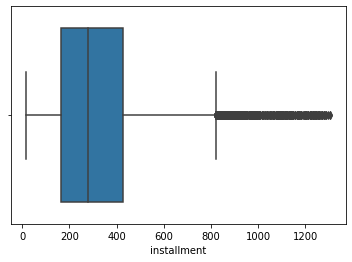

In [ ]:
import seaborn as sns
sns.boxplot(x=data['installment']) #Univariate method

#### **Z score Method**


In [ ]:
float_columns_df = data.select_dtypes(include=['float64'])
float_columns_df_o = float_columns_df.copy()
z = stats.zscore(float_columns_df)
#print(z)
threshold = 3
print(np.where(z > 3))

(array([   18,    27,    31, ..., 42510, 42511, 42518]), array([11, 11,  2, ..., 11, 19,  5]))


The first array contains the list of row numbers and second array respective column numbers, which means z[18][6] and z[31][2] has a Z-score higher than 3. These are outliers, as seen below

In [ ]:
#print(float_columns_df[30:35])
float_columns_df.iloc[[30,31,32,33], [1,2]]

,term,installment
30,36.0,136.11
31,36.0,995.82
32,60.0,242.97
33,36.0,158.77


Removing outlier using Z score method

In [ ]:
float_columns_df.shape

(42535, 26)

In [ ]:
float_columns_df_o = float_columns_df_o[(z < 3).all(axis=1)]
float_columns_df_o.shape

(35524, 26)

In [ ]:
uint8_columns_df = data.select_dtypes(include=['uint8'])
uint8_columns_df.shape

(42535, 8)

In [ ]:
z = stats.zscore(uint8_columns_df)
#print(z)
threshold = 2.5
print(np.where(z > 2.5))
uint8_columns_df_o = uint8_columns_df[(z < 2.5).all(axis=1)]
uint8_columns_df_o.shape

(array([    8,    10,    11, ..., 42508, 42527, 42533]), array([3, 3, 3, ..., 3, 3, 1]))


(39140, 8)

#### **IQR method**

In [ ]:
float_columns_df = data.select_dtypes(include=['float64'])
float_columns_df_o2 = float_columns_df.copy()
float_columns_df.shape

(42535, 26)

In [ ]:
Q1 = float_columns_df.quantile(0.25)
Q3 = float_columns_df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
#print(float_columns_df < (Q1 - (1.5 * IQR))) |(float_columns_df > (Q3 + 1.5 * IQR))
test1 = float_columns_df < (Q1 - 1.5 * IQR)
test2 = float_columns_df > (Q3 + 1.5 * IQR)
print(test1 | test2)

       loan_amnt   term  ...  last_fico_range_low  pub_rec_bankruptcies
0          False  False  ...                False                 False
1          False  False  ...                 True                 False
2          False  False  ...                False                 False
3          False  False  ...                False                 False
4          False  False  ...                False                 False
...          ...    ...  ...                  ...                   ...
42532      False  False  ...                False                 False
42533      False  False  ...                False                 False
42534      False  False  ...                False                 False
42535      False  False  ...                False                 False
42550      False  False  ...                False                 False

[42535 rows x 26 columns]


The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [ ]:
float_columns_df_o2.shape

(42535, 26)

In [ ]:
float_columns_df_o2 = float_columns_df_o2[~((float_columns_df < (Q1 - 1.5 * IQR)) |(float_columns_df > (Q3 + 1.5 * IQR))).any(axis=1)]
float_columns_df_o2.shape

(26487, 26)

In [ ]:
Q1 = uint8_columns_df.quantile(0.25)
Q3 = uint8_columns_df.quantile(0.75)
IQR = Q3 - Q1
test1 = uint8_columns_df < (Q1 - 1.5 * IQR)
test2 = uint8_columns_df > (Q3 + 1.5 * IQR)
print(test1 | test2)
uint8_columns_df_o2 = uint8_columns_df[~((uint8_columns_df < (Q1 - 1.5 * IQR)) |(uint8_columns_df > (Q3 + 1.5 * IQR))).any(axis=1)]
uint8_columns_df_o2.shape # (32741, 3)

       home_ownership_MORTGAGE  ...  verification_status_Verified
0                        False  ...                         False
1                        False  ...                         False
2                        False  ...                         False
3                        False  ...                         False
4                        False  ...                         False
...                        ...  ...                           ...
42532                    False  ...                         False
42533                    False  ...                         False
42534                    False  ...                         False
42535                    False  ...                         False
42550                    False  ...                         False

[42535 rows x 8 columns]


(29640, 8)

These two methods greatly decrease the size of the dataset, and thus seem unsuitable.


### **Class Imbalance**

In [ ]:
X_train = data.copy()
del X_train['loan_status']
y_train = data['loan_status']


(array([10183., 12389.,  8740.,  6016.,  3394.,  1301.,   512.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

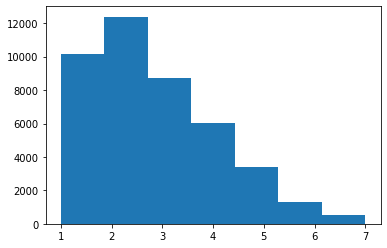

In [ ]:
import matplotlib.pyplot as plt
y_train.unique()
plt.hist(y_train, bins = 7)


We can clearly see a class imbalance